In [1]:
# Load imports
import pandas as pd
import matplotlib.pyplot as plt
from utils import getFiles, getConstructorColours

In [2]:
# Load datasets
files = getFiles()

# Load all datasets into a dictionary
data = {name: pd.read_csv(path) for name, path in files.items()}

In [3]:
# Merge data to get driver standings by year
driver_performance = pd.merge(data['driver_standings'], data['drivers'], on='driverId')
driver_performance = pd.merge(driver_performance, data['races'], on='raceId')

# Prepare results subset and rename constructorId for clarity
results_subset = data['results'][['raceId', 'driverId', 'constructorId']].rename(columns={'constructorId': 'constructorId_results'})

# Merge with results to get constructorId and then with constructors to get team names
driver_performance = pd.merge(driver_performance, results_subset, on=['raceId', 'driverId'])
constructors_subset = data['constructors'][['constructorId', 'name']].rename(columns={'name': 'team_name'})
driver_performance = pd.merge(driver_performance, constructors_subset, left_on='constructorId_results', right_on='constructorId')

# Drop extra columns from merge
driver_performance = driver_performance.drop(columns=['constructorId_results', 'constructorId'])

In [4]:
# Filter data for the 2024 season
driver_performance_2024 = driver_performance[driver_performance['year'] == 2024].copy()

In [5]:
# Define custom colors for each team
custom_colors = getConstructorColours()

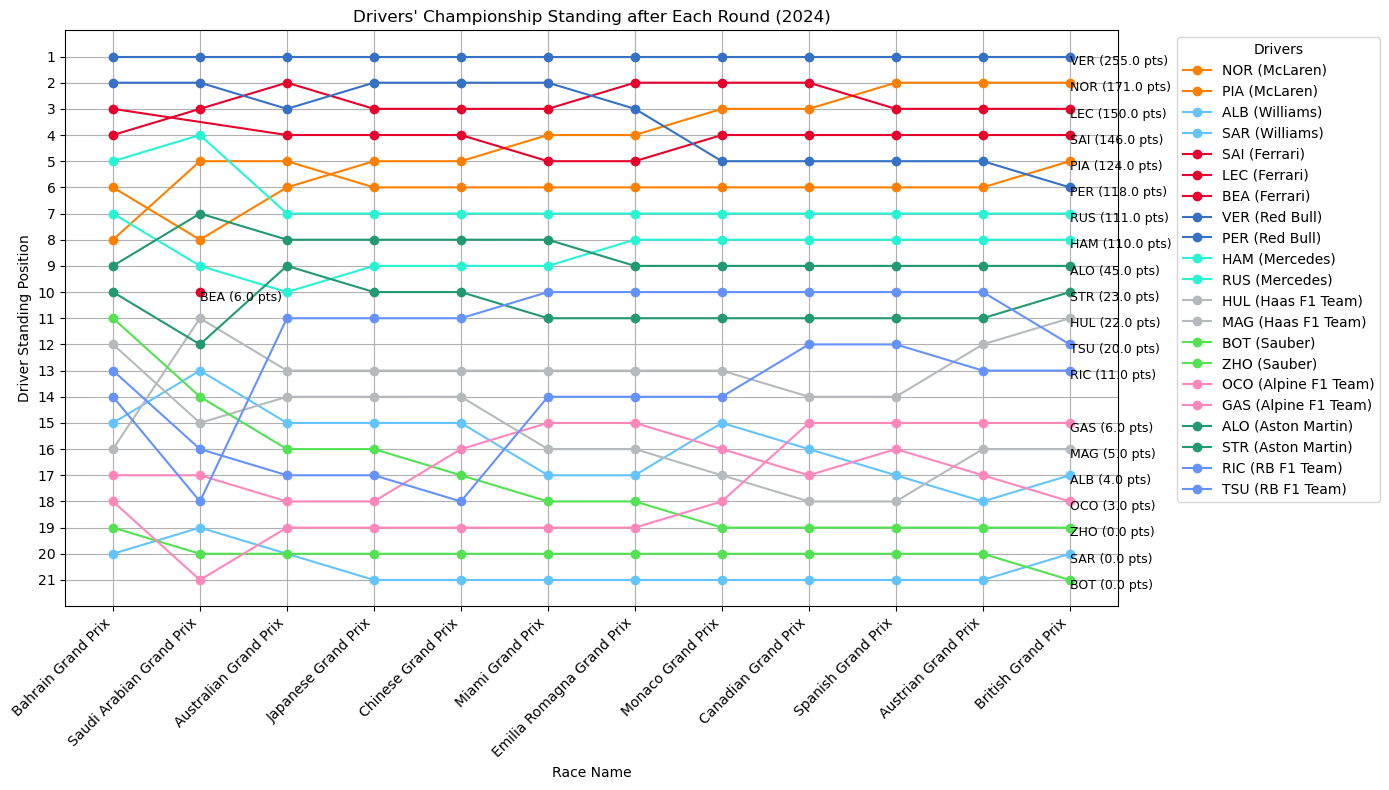

In [6]:
# Plotting driver standings
plt.figure(figsize=(14, 8))

# Loop through each driver code to plot their standings over rounds
for code in driver_performance_2024['code'].unique():
    driver_data = driver_performance_2024[driver_performance_2024['code'] == code]
    team = driver_data['team_name'].iloc[0]  # Get the team name for the driver
    
    # Plotting all points
    plt.plot(driver_data['name'], driver_data['position'], marker='o',
             label=f'{code} ({team})', color=custom_colors.get(team, '#000000'), linestyle='-')

    # Adding labels to the last point only, with offset to the right
    last_row = driver_data.iloc[-1]
    plt.text(
        x=last_row['name'], 
        y=last_row['position'] + 0.2,  # Offset label to avoid overlapping with the point
        s=f'{last_row["code"]} ({last_row["points"]} pts)', 
        fontsize=9, 
        ha='left', 
        va='center', 
        color='black'
    )

# Invert y-axis so 1st position is at the top
plt.gca().invert_yaxis()

# Set y-axis ticks to be every integer value
max_position = driver_performance_2024['position'].max()  # Find the maximum position
plt.yticks(range(1, max_position + 1))

# Add labels and title
plt.xlabel('Race Name')
plt.ylabel('Driver Standing Position')
plt.title('Drivers\' Championship Standing after Each Round (2024)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Drivers', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Merge constructor standings with constructor data
constructors_performance = pd.merge(data['constructor_standings'], data['constructors'], on='constructorId')

In [8]:
# Merge with races data to get race names
races_subset = data['races'][['raceId', 'name', 'year']]
constructors_performance = pd.merge(constructors_performance, races_subset, on='raceId')

In [9]:
# Prepare results subset for constructors
results_subset = data['results'][['raceId', 'constructorId']]
constructors_performance = pd.merge(constructors_performance, results_subset, on=['raceId', 'constructorId'])

In [10]:
# Filter data for the 2024 season
constructors_performance_2024 = constructors_performance[constructors_performance['year'] == 2024].copy()

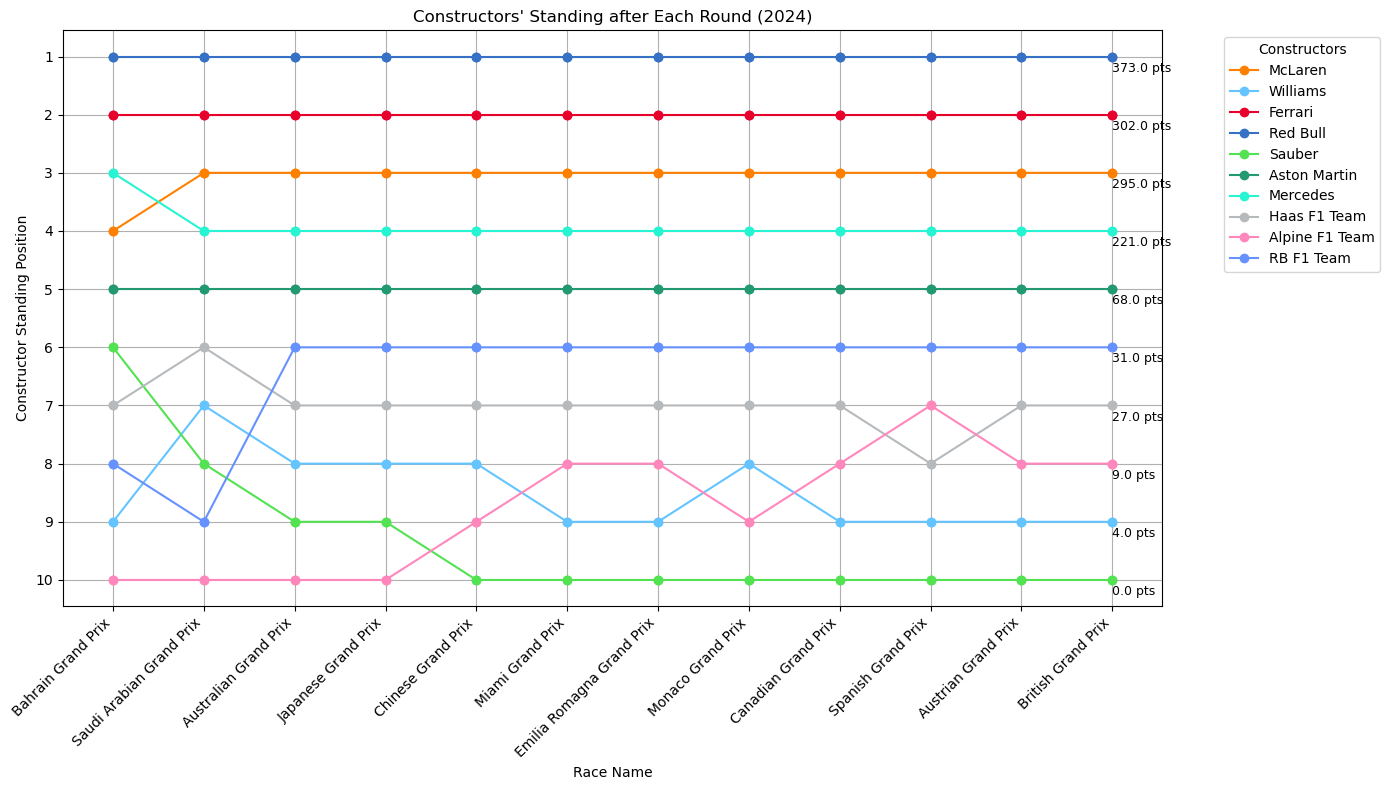

In [11]:
# Plotting constructor standings
plt.figure(figsize=(14, 8))

# Loop through each constructor name to plot their standings over rounds
for name in constructors_performance_2024['name_x'].unique():
    constructor_data = constructors_performance_2024[constructors_performance_2024['name_x'] == name]
    
    # Plotting all points
    plt.plot(constructor_data['name_y'], constructor_data['position'], marker='o',
             label=f'{name}', color=custom_colors.get(name, '#000000'), linestyle='-')
    
    # Adding labels to the last point only, with offset to the right
    last_row = constructor_data.iloc[-1]
    plt.text(
        x=last_row['name_y'], 
        y=last_row['position'] + 0.2,  # Offset label to avoid overlapping with the point
        s=f'{last_row["points"]} pts', 
        fontsize=9, 
        ha='left', 
        va='center', 
        color='black'
    )

# Invert y-axis so 1st position is at the top
plt.gca().invert_yaxis()

# Set y-axis ticks to be every integer value
max_position = constructors_performance_2024['position'].max()  # Find the maximum position
plt.yticks(range(1, max_position + 1, 1))

# Add labels and title
plt.xlabel('Race Name')
plt.ylabel('Constructor Standing Position')
plt.title('Constructors\' Standing after Each Round (2024)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Constructors', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside plot
plt.grid(True)
plt.tight_layout()
plt.show()